# Decision Tree

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

- Ajustar el modelo a un Decision Tree

- Extraer las métricas

- Debatid entre vosotras que modelo es mejor y por qué (basándose en las métricas)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('once')

import sys
sys.path.append("../../")
from src import funciones as fun
from src import variables as var

## 1º: Decision Tree Label

In [2]:
df_label = pd.read_pickle('../archivos/country_label.pkl')
df_label.sample()

,country,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,...,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary,basic_boxcox,country_label
2784,Sweden,0.236467,0.574074,0.041667,0.265896,0.202899,0.32,1.038528,1.266904,0.538462,...,-0.641757,-0.259102,0.095654,0.64455,0.225696,-0.762713,0.077859,0.09827,-0.782114,181


In [3]:
Xl = df_label.drop(['basic_boxcox', 'country', 'basic'], axis = 1)
yl = df_label["basic"]

In [4]:
xl_train, xl_test, yl_train, yl_test = train_test_split(Xl, yl, test_size = 0.3, random_state = 42)

In [5]:
arbol = DecisionTreeRegressor(random_state = 0) 

In [6]:
arbol.fit(xl_train, yl_train) 

DecisionTreeRegressor(random_state=0)

In [7]:
# fig = plt.figure(figsize = (10,6))
# tree.plot_tree(arbol, feature_names = xl_train.columns, filled = True)
# plt.show() 

In [8]:
max_features = np.sqrt(len(xl_train.columns))
max_features

4.795831523312719

In [9]:
print(arbol.tree_.max_depth)

33


In [10]:
yl_pred_test_dt = arbol.predict(xl_test)
yl_pred_train_dt = arbol.predict(xl_train)

In [11]:
dt_resultsl = fun.metricas(yl_test, yl_train, yl_pred_test_dt, yl_pred_train_dt, "Decission Tree Label")
dt_resultsl

,MAE,MSE,RMSE,R2,set,modelo
0,4.424041e-01,4.866278e-01,6.975872e-01,0.014296,test,Decission Tree Label
1,2.130265e-19,1.478168e-35,3.844695e-18,1.000000,train,Decission Tree Label


En este modelo tenemos un claro overfitting.

## Probamos con el encondig GET DUMMIES

In [12]:
df_dummie = pd.read_pickle('../archivos/country_dummie.pkl')
df_dummie.sample()

,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,...,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe
1460,-1.042735,-0.837963,-0.583333,-0.179191,-0.992754,-0.536364,-0.708087,-0.982206,-0.362637,-0.74183,...,0,0,0,0,0,0,0,0,0,0


In [13]:
Xd = df_dummie.drop(['basic_boxcox', 'basic'], axis = 1)
yd = df_dummie["basic"]

In [14]:
xd_train, xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size = 0.2, random_state = 42)

In [15]:
arbold = DecisionTreeRegressor(random_state = 0) 

In [16]:
arbold.fit(xd_train, yd_train) 

DecisionTreeRegressor(random_state=0)

In [17]:
max_features = np.sqrt(len(xd_train.columns))
max_features

15.198684153570664

In [18]:
print(arbold.tree_.max_depth)

35


In [19]:
yd_pred_test_dt = arbold.predict(xd_test)
yd_pred_train_dt = arbold.predict(xd_train)

In [20]:
dt_resultsd = fun.metricas(yd_test, yd_train, yd_pred_test_dt, yd_pred_train_dt, "Decission Tree Dummie 1")
dt_resultsd

,MAE,MSE,RMSE,R2,set,modelo
0,4.085831e-01,3.699387e-01,6.082259e-01,0.252958,test,Decission Tree Dummie 1
1,1.922077e-19,4.142582e-35,6.436289e-18,1.000000,train,Decission Tree Dummie 1


In [21]:
# definimos un diccionario con los hiperparámetros

paramd1 = {"max_depth": [13,15,17,19],
        "max_features": [1,2,3,4],
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

In [22]:
gsd = GridSearchCV(
            estimator=DecisionTreeRegressor(), 
            param_grid= paramd1, 
            cv=10, 
            verbose=-1,
            return_train_score = True, 
            scoring="neg_mean_squared_error")

In [23]:
gsd.fit(xd_train, yd_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [13, 15, 17, 19],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [24]:
modelo_dummie = gsd.best_estimator_
modelo_dummie

DecisionTreeRegressor(max_depth=15, max_features=4, min_samples_leaf=10,
                      min_samples_split=10)

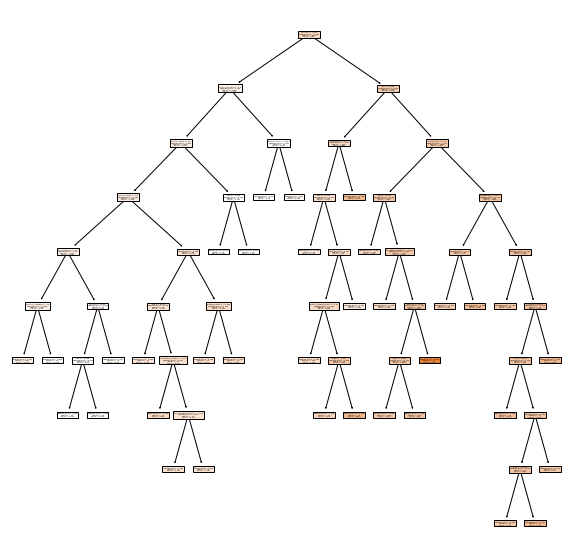

In [25]:
fig = plt.figure(figsize=(10, 10))
tree.plot_tree(modelo_dummie, feature_names=xd_train.columns, filled=True);

In [26]:
yd_pred_test_dt2 = modelo_dummie.predict(xd_test)
yd_pred_train_dt2 = modelo_dummie.predict(xd_train)

In [27]:
dt_results2d = fun.metricas(yd_test, yd_train, yd_pred_test_dt2, yd_pred_train_dt2, "Decission Tree 2 Dummie")
dt_results2d

,MAE,MSE,RMSE,R2,set,modelo
0,0.432590,0.344710,0.587120,0.303904,test,Decission Tree 2 Dummie
1,0.426257,0.354895,0.595731,0.348809,train,Decission Tree 2 Dummie


## Probamos con el encondig al que le dimos un orden manualmente

In [28]:
df_orden = pd.read_pickle('../archivos/country_pesos.pkl')
df_orden.head()

,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,...,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary,basic_boxcox,country_pesos
0,-0.219373,0.601852,2.395833,1.046243,1.304348,0.747273,4.294342,3.245552,0.307692,1.218954,...,0.465023,-0.302919,1.074934,0.208531,0.101671,1.262442,0.904358,0.517125,0.397744,1
1,-0.350427,0.625000,3.520833,-0.289017,-0.014493,-0.292727,0.338771,0.241993,-0.142857,1.035948,...,-0.534202,-0.439942,1.455932,0.053956,1.617468,2.248014,0.750069,-0.004580,-0.617292,0
2,-0.552707,0.421296,1.791667,-0.398844,-0.384058,-0.490909,0.148560,0.014235,-0.285714,0.570261,...,-0.588840,-0.450326,-0.011987,0.053956,0.335639,2.036034,-0.045124,-0.090119,-0.698365,0
3,-0.923077,-0.069444,-0.625000,-0.514451,-0.934783,-0.505455,-0.656716,-1.081851,-0.461538,0.315359,...,-0.727198,-0.635978,-0.452562,-0.564346,-0.358551,-0.390842,-0.034428,-0.324674,-0.930884,0
4,-0.746439,-0.398148,-0.666667,-0.502890,-0.884058,-0.483636,-0.690038,-0.967972,-0.450549,0.315359,...,-0.602435,-0.670930,-0.661335,-0.475392,-0.409781,-0.590637,-0.371835,-0.347005,-0.719354,0


In [29]:
Xo = df_orden.drop(['basic_boxcox', 'basic'], axis = 1)
yo = df_orden["basic"]

In [30]:
xo_train, xo_test, yo_train, yo_test = train_test_split(Xo, yo, test_size = 0.3, random_state = 42)

In [31]:
arbolo = DecisionTreeRegressor(random_state = 0) 

In [32]:
arbolo.fit(xo_train, yo_train) 

DecisionTreeRegressor(random_state=0)

In [33]:
max_features = np.sqrt(len(xo_train.columns))
max_features

4.795831523312719

In [34]:
print(arbolo.tree_.max_depth)

31


In [35]:
yo_pred_test_dt = arbolo.predict(xo_test)
yo_pred_train_dt = arbolo.predict(xo_train)

In [36]:
dt_resultso = fun.metricas(yo_test, yo_train, yo_pred_test_dt, yo_pred_train_dt, "Decission Tree Orden 1")
dt_resultso

,MAE,MSE,RMSE,R2,set,modelo
0,4.323555e-01,4.719384e-01,6.869777e-01,0.04405,test,Decission Tree Orden 1
1,1.331416e-19,1.256443e-35,3.544634e-18,1.00000,train,Decission Tree Orden 1


Unimos las métricas de todos nuestros modelos:

In [37]:
metricas_decision_tree = pd.concat([dt_resultsl, dt_resultsd, dt_results2d, dt_resultso], axis = 0)

In [38]:
metricas_decision_tree

,MAE,MSE,RMSE,R2,set,modelo
0,4.424041e-01,4.866278e-01,6.975872e-01,0.014296,test,Decission Tree Label
1,2.130265e-19,1.478168e-35,3.844695e-18,1.000000,train,Decission Tree Label
0,4.085831e-01,3.699387e-01,6.082259e-01,0.252958,test,Decission Tree Dummie 1
1,1.922077e-19,4.142582e-35,6.436289e-18,1.000000,train,Decission Tree Dummie 1
0,4.325904e-01,3.447103e-01,5.871204e-01,0.303904,test,Decission Tree 2 Dummie
1,4.262567e-01,3.548955e-01,5.957310e-01,0.348809,train,Decission Tree 2 Dummie
0,4.323555e-01,4.719384e-01,6.869777e-01,0.044050,test,Decission Tree Orden 1
1,1.331416e-19,1.256443e-35,3.544634e-18,1.000000,train,Decission Tree Orden 1


En todos nuestros decision tree nos encontramos con que tenemos overfitting (el train esta sobreaprendiendo y no es capaz de hacer predicciones).

In [39]:
metricas_decision_tree.to_csv('../archivos/metricas_decision_tree.csv')